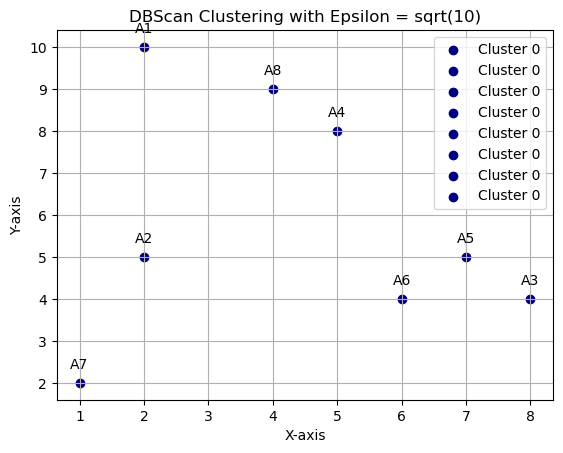

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Define your data points
points = np.array([
    [2, 10],
    [2, 5],
    [8, 4],
    [5, 8],
    [7, 5],
    [6, 4],
    [1, 2],
    [4, 9]
])

# Scale the data (important for DBScan)
scaler = StandardScaler()
scaled_points = scaler.fit_transform(points)

# Define the DBScan model with the updated epsilon
epsilon = np.sqrt(10)
db = DBSCAN(eps=epsilon, min_samples=2)

# Fit the model to the scaled data
db.fit(scaled_points)

# Get the labels for each point (cluster assignments)
labels = db.labels_

# Create a scatter plot for the data points with different colors for clusters
unique_labels = set(labels)
colors = [plt.cm.jet(float(i) / len(unique_labels)) for i in unique_labels]

# Add labels for each point with different colors for clusters
for i, (x, y) in enumerate(points):
    label = labels[i]
    plt.scatter(x, y, c=[colors[label]], label=f'Cluster {label}')
    plt.annotate(f'A{i + 1}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Show the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('DBScan Clustering with Epsilon = sqrt(10)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
If you increase the value of Epsilon to sqrt(10), the DBScan clustering algorithm will consider a larger
neighborhood for forming clusters. With this change, the data points will merge into a single cluster, 
as all points are within the expanded radius.

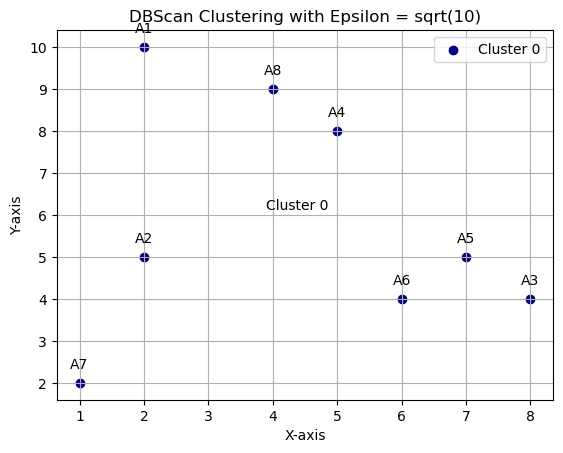

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Define your data points
points = np.array([
    [2, 10],
    [2, 5],
    [8, 4],
    [5, 8],
    [7, 5],
    [6, 4],
    [1, 2],
    [4, 9]
])

# Scale the data (important for DBScan)
scaler = StandardScaler()
scaled_points = scaler.fit_transform(points)

# Define the DBScan model with the updated epsilon
epsilon = np.sqrt(10)
db = DBSCAN(eps=epsilon, min_samples=2)

# Fit the model to the scaled data
db.fit(scaled_points)

# Get the labels for each point (cluster assignments)
labels = db.labels_

# Create a scatter plot for the data points with different colors for clusters
unique_labels = set(labels)
colors = [plt.cm.jet(float(i) / len(unique_labels)) for i in unique_labels]

# Create a dictionary to store cluster centers
cluster_centers = {}

for i, label in enumerate(unique_labels):
    cluster_points = points[labels == label]
    cluster_center = np.mean(cluster_points, axis=0)
    cluster_centers[label] = cluster_center
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[colors[i]], label=f'Cluster {label}')

# Add labels for each point
for i, point in enumerate(points):
    plt.annotate(f'A{i + 1}', (point[0], point[1]), textcoords="offset points", xytext=(0, 10), ha='center')

# Annotate cluster labels at the cluster centers
for label, center in cluster_centers.items():
    plt.annotate(f'Cluster {label}', center, textcoords="offset points", xytext=(0, 10), ha='center', va='center')

# Show the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('DBScan Clustering with Epsilon = sqrt(10)')
plt.grid(True)
plt.legend()
plt.show()


In [9]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Define your dataset
data = np.array([
    [1, 1],
    [0, 1],
    [1, 0],
    [11, 12],
    [11, 13],
    [13, 13],
    [12, 8.5],
    [13, 8],
    [13, 9],
    [13, 7],
    [11, 7],
    [8, 2],
    [9, 2],
    [10, 1],
    [7, 13],
    [5, 9],
    [16, 16],
    [11.5, 8],
    [13, 10],
    [12, 13],
    [14, 12.5],
    [14.5, 11.5],
    [15, 10.5],
    [15, 9.5],
    [12, 9.5],
    [10.5, 11],
    [10, 10.5],
    [9, 3],
    [9, 4],
    [9, 5]
])

# Parameters
min_samples = 2
eps = 2.0

# Calculate reachability distances
nn = NearestNeighbors(n_neighbors=len(data))
nn.fit(data)
distances, indices = nn.kneighbors(data)
reachability_distances = np.max(distances, axis=1)
reachability_distances[reachability_distances == 0] = float('inf')  # Set unreachable points to infinity

# Print reachability distances
for i, rd in enumerate(reachability_distances):
    print(f"Instance {i + 1}: Reachability Distance = {rd:.2f}")


Instance 1: Reachability Distance = 21.21
Instance 2: Reachability Distance = 21.93
Instance 3: Reachability Distance = 21.93
Instance 4: Reachability Distance = 15.62
Instance 5: Reachability Distance = 16.40
Instance 6: Reachability Distance = 17.69
Instance 7: Reachability Distance = 14.15
Instance 8: Reachability Distance = 14.76
Instance 9: Reachability Distance = 15.26
Instance 10: Reachability Distance = 14.32
Instance 11: Reachability Distance = 12.53
Instance 12: Reachability Distance = 16.12
Instance 13: Reachability Distance = 15.65
Instance 14: Reachability Distance = 16.16
Instance 15: Reachability Distance = 14.32
Instance 16: Reachability Distance = 13.04
Instance 17: Reachability Distance = 21.93
Instance 18: Reachability Distance = 13.46
Instance 19: Reachability Distance = 15.81
Instance 20: Reachability Distance = 17.03
Instance 21: Reachability Distance = 18.12
Instance 22: Reachability Distance = 17.90
Instance 23: Reachability Distance = 17.76
Instance 24: Reachab

In [13]:
import numpy as np
from sklearn.cluster import OPTICS

# Create your dataset or load it from a file
data = np.array([[x, y] for x, y in zip(range(10), [1, 2, 3, 7, 8, 9, 20, 21, 22, 25])])

# Initialize the OPTICS clustering with the desired parameters
min_samples = 2
epsilon = 2
optics = OPTICS(min_samples=min_samples, xi=0.05, metric='euclidean')  # Valid xi value (e.g., 0.05)

# Fit the OPTICS model to your data
optics.fit(data)

# Retrieve the reachability distances and cluster ordering
reachability_distances = optics.reachability_
cluster_ordering = optics.ordering_

# Print the reachability distances
print("Reachability Distances:")
for i, distance in enumerate(reachability_distances):
    print(f"Instance {i + 1}: {distance}")

# Print the cluster ordering
print("Cluster Ordering:")
for i, order in enumerate(cluster_ordering):
    print(f"Instance {i + 1}: {order}")


Reachability Distances:
Instance 1: inf
Instance 2: 1.414213562373095
Instance 3: 1.414213562373095
Instance 4: 4.12310562561766
Instance 5: 1.414213562373095
Instance 6: 1.414213562373095
Instance 7: 11.045361017187261
Instance 8: 1.414213562373095
Instance 9: 1.414213562373095
Instance 10: 3.16227766016838
Cluster Ordering:
Instance 1: 0
Instance 2: 1
Instance 3: 2
Instance 4: 3
Instance 5: 4
Instance 6: 5
Instance 7: 6
Instance 8: 7
Instance 9: 8
Instance 10: 9


Instance 1: Reachability Distance = inf, Cluster Label = 0
Instance 2: Reachability Distance = 1.00, Cluster Label = 0
Instance 3: Reachability Distance = 1.00, Cluster Label = 0
Instance 4: Reachability Distance = 7.07, Cluster Label = 5
Instance 5: Reachability Distance = 1.00, Cluster Label = 5
Instance 6: Reachability Distance = 1.00, Cluster Label = 5
Instance 7: Reachability Distance = 1.00, Cluster Label = 2
Instance 8: Reachability Distance = 1.00, Cluster Label = 3
Instance 9: Reachability Distance = 1.41, Cluster Label = 3
Instance 10: Reachability Distance = 2.83, Cluster Label = 3
Instance 11: Reachability Distance = 1.12, Cluster Label = 2
Instance 12: Reachability Distance = 0.71, Cluster Label = 1
Instance 13: Reachability Distance = 1.00, Cluster Label = 1
Instance 14: Reachability Distance = 1.12, Cluster Label = 1
Instance 15: Reachability Distance = 1.00, Cluster Label = 6
Instance 16: Reachability Distance = 1.00, Cluster Label = -1
Instance 17: Reachability Distanc

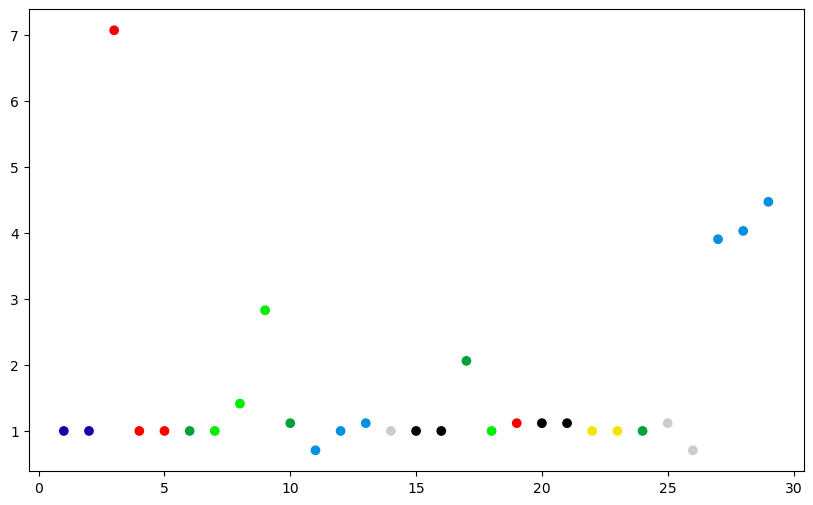

In [31]:
import numpy as np
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Define your dataset (replace with your data)
data = np.array([
    [1, 1],
    [0, 1],
    [1, 0],
    [11, 12],
    [11, 13],
    [13, 13],
    [12, 8.5],
    [13, 8],
    [13, 9],
    [13, 7],
    [11, 7],
    [8, 2],
    [9, 2],
    [10, 1],
    [7, 13],
    [5, 9],
    [16, 16],
    [11.5, 8],
    [13, 10],
    [12, 13],
    [14, 12.5],
    [14.5, 11.5],
    [15, 10.5],
    [15, 9.5],
    [12, 9.5],
    [10.5, 11],
    [10, 10.5],
    [9, 3],
    [9, 4],
    [9, 5]
    # ... Include the rest of your dataset ...
])

# Create an OPTICS clustering model
clustering = OPTICS(min_samples=2, xi=0.05)  # Change xi to a valid value

# Fit the model to the data
clustering.fit(data)

# Get the cluster labels (-1 represents noise points)
cluster_labels = clustering.labels_

# Get the reachability distances
reachability_distances = clustering.reachability_[clustering.ordering_]

# Print instance number, reachability distance, and cluster label
for i, (rd, label) in enumerate(zip(reachability_distances, cluster_labels)):
    print(f"Instance {i + 1}: Reachability Distance = {rd:.2f}, Cluster Label = {label}")

# Plot the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(reachability_distances)), reachability_distances, c=cluster_labels, cmap=plt.cm.nipy_spectral)
plt.show()


In [33]:
import numpy as np
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Define a small dataset
data = np.array([
    [1, 1],
    [0, 1],
    [1, 0],
    [11, 12],
    [11, 13],
    [13, 13],
    [12, 8.5],
    [13, 8],
    [13, 9],
    [13, 7],
    [11, 7],
    [8, 2],
    [9, 2],
    [10, 1],
    [7, 13],
    [5, 9],
    [16, 16],
    [11.5, 8],
    [13, 10],
    [12, 13],
    [14, 12.5],
    [14.5, 11.5],
    [15, 10.5],
    [15, 9.5],
    [12, 9.5],
    [10.5, 11],
    [10, 10.5],
    [9, 3],
    [9, 4],
    [9, 5]
])

# Create an OPTICS model
optics = OPTICS(min_samples=2, eps=2)

# Fit the model to the data
optics.fit(data)

# Get the cluster ordering and reachability distances
reachability_distances = optics.reachability_
cluster_ordering = optics.ordering_

# Define a reachability distance threshold for clustering
threshold = 1.2

# Set a slightly higher threshold to account for small variations
margin = 0.01
threshold += margin

# Initialize variables for clustering
current_cluster = []
clusters = []
noise_points = []

# Iterate through the cluster ordering to form clusters
for i, point in enumerate(data):
    reachability_distance = reachability_distances[i]

    if reachability_distance <= threshold:
        # Include the point in the current cluster
        current_cluster.append(point)
    else:
        # If the point is not part of a cluster, consider it noise
        if current_cluster:
            clusters.append(current_cluster)
            current_cluster = []
        noise_points.append(point)

# Set the reachability distance of noise points to infinity
for i, point in enumerate(data):
    if reachability_distances[i] > threshold:
        reachability_distances[i] = np.inf

# Add the last cluster, if any
if current_cluster:
    clusters.append(current_cluster)

# Print the clusters
for i, cluster in enumerate(clusters):
    print(f"Cluster {i + 1}: {cluster}")

# Print noise points
print(f"\nNoise Points: {noise_points}")

# Print reachability distance and cluster ordering of each data point
for i, point in enumerate(data):
    print(f"Data Point {i + 1}: Reachability Distance = {reachability_distances[i]:.2f}, Cluster Ordering = {cluster_ordering[i]}")

# Print instance pairs (pairwise reachability distances)
for i in range(len(data)):
    for j in range(i + 1, len(data)):
        pair_distance = reachability_distances[i] if reachability_distances[i] >= reachability_distances[j] else reachability_distances[j]
        print(f"Instance Pair ({i + 1}, {j + 1}): Pairwise Reachability Distance = {pair_distance:.2f}")

# Count the unique cluster labels, excluding noise points (-1)
cluster_labels = optics.labels_
total_clusters = len(set(cluster_labels)) - 1
print(f"\nTotal number of clusters formed: {total_clusters}")


Cluster 1: [array([0., 1.]), array([1., 0.]), array([11., 12.]), array([11., 13.]), array([13., 13.]), array([12. ,  8.5]), array([13.,  8.]), array([13.,  9.]), array([13.,  7.])]
Cluster 2: [array([9., 2.])]
Cluster 3: [array([11.5,  8. ]), array([13., 10.]), array([12., 13.]), array([14. , 12.5]), array([14.5, 11.5])]
Cluster 4: [array([15. ,  9.5]), array([12. ,  9.5]), array([10.5, 11. ]), array([10. , 10.5]), array([9., 3.]), array([9., 4.]), array([9., 5.])]

Noise Points: [array([1., 1.]), array([11.,  7.]), array([8., 2.]), array([10.,  1.]), array([ 7., 13.]), array([5., 9.]), array([16., 16.]), array([15. , 10.5])]
Data Point 1: Reachability Distance = inf, Cluster Ordering = 0
Data Point 2: Reachability Distance = 1.00, Cluster Ordering = 1
Data Point 3: Reachability Distance = 1.00, Cluster Ordering = 2
Data Point 4: Reachability Distance = 1.00, Cluster Ordering = 11
Data Point 5: Reachability Distance = 1.00, Cluster Ordering = 12
Data Point 6: Reachability Distance = 1.